In [20]:
import os
import pandas as pd
import numpy as np
import requests
import json
import glob
import re

In [4]:
from matplotlib import pyplot as plt
from monty.serialization import loadfn

In [1]:
d_dir = './FastCharge/data-share/features/DeltaQFastCharge' # Directory for DeltaQFastCharge
t_dir = './FastCharge/data-share/features/TrajectoryFastCharge' # Directory for TrajectoryFastCharge

In [5]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if ".json" in fullPath:
            allFiles.append(fullPath)
    return allFiles

Getting Features

In [18]:
d_list = getListOfFiles(d_dir)
print(len(d_list))
d_list

139


['./FastCharge/data-share/features/DeltaQFastCharge/FastCharge_000000_CH19_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge/FastCharge_000001_CH16_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge/FastCharge_000001_CH30_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge/FastCharge_000001_CH38_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge/FastCharge_000002_CH10_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge/FastCharge_000002_CH18_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge/FastCharge_000002_CH2_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge/FastCharge_000002_CH34_features_DeltaQFastCharge.json',
 './FastCharge/data-share/features/DeltaQFastCharge/FastCharge_000002_CH42_features_DeltaQFastCharge.json',
 './FastCharge/data-share/fea

In [77]:
new_names = []
for file in d_list:
    new_names.append(re.findall("CH(.*?)\_f", file)[0])
new_names

['19',
 '16',
 '30',
 '38',
 '10',
 '18',
 '2',
 '34',
 '42',
 '47',
 '7',
 '39',
 '40',
 '1',
 '2',
 '3',
 '18',
 '11',
 '19',
 '27',
 '35',
 '3',
 '43',
 '48',
 '8',
 '24',
 '39',
 '47',
 '48',
 '4',
 '7',
 '8',
 '44',
 '26',
 '13',
 '15',
 '21',
 '23',
 '29',
 '37',
 '45',
 '5',
 '13',
 '14',
 '23',
 '24',
 '12',
 '14',
 '20',
 '22',
 '28',
 '36',
 '44',
 '4',
 '17',
 '17',
 '1',
 '25',
 '33',
 '41',
 '46',
 '6',
 '9',
 '18',
 '29',
 '30',
 '23',
 '28',
 '24',
 '37',
 '38',
 '45',
 '7',
 '5',
 '6',
 '31',
 '19',
 '20',
 '10',
 '9',
 '30',
 '9',
 '22',
 '14',
 '27',
 '12',
 '48',
 '21',
 '22',
 '13',
 '27',
 '28',
 '32',
 '10',
 '36',
 '16',
 '11',
 '12',
 '1',
 '2',
 '3',
 '31',
 '32',
 '21',
 '43',
 '44',
 '37',
 '32',
 '40',
 '15',
 '16',
 '41',
 '42',
 '15',
 '20',
 '11',
 '35',
 '36',
 '45',
 '46',
 '33',
 '29',
 '43',
 '47',
 '5',
 '6',
 '39',
 '33',
 '34',
 '25',
 '26',
 '41',
 '42',
 '38',
 '25',
 '46',
 '40',
 '34',
 '35']

In [78]:
d_df = pd.DataFrame()
for file in d_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        d_df = pd.concat([d_df,data_df])
d_df.reset_index(drop=True,inplace=True)
d_df['bat_num'] = new_names
d_df.head()

,@module,@class,name,@version,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.internal_resistance_difference_cycles_2:100,X.nominal_capacity_by_median,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.init_pred_cycle,metadata.parameters.mid_pred_cycle,metadata.parameters.final_pred_cycle,metadata.parameters.n_nominal_cycles,bat_num
0,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0454259],[0.8891461000000003],[1.0331815],[231072.4263671875],[614.4000244140625],[-1.1444158302992298],...,[-0.0010415539145469666],[1.047977],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,10,91,100,40,19
1,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0620247999999999],[0.48970650000000004],[1.0439155],[149767.85131961218],[563.2000122070312],[-1.2773591296554208],...,[0.0003414759412407875],[1.06011365],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,10,91,100,40,16
2,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0678786],[0.4961450999999999],[1.054091],[205315.4877278646],[614.4000244140625],[-1.3752393675218624],...,[0.00024036318063735962],[1.06736225],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,10,91,100,40,30
3,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0512739],[0.49011190000000004],[1.0341983000000001],[159799.4890051929],[563.2000122070312],[-1.2430890844325302],...,[0.00042933784425258636],[1.05098615],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,10,91,100,40,38
4,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0665728],[0.47571469999999993],[1.0695093],[146029.5250360061],[614.4000244140625],[-1.640443517452452],...,[-0.0001586293801665306],[1.0708095],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,10,91,100,40,10


In [79]:
batches = []
for i in d_df['metadata.protocol']:
    if '2017-05' in i:
        batches.append('b1')
    elif '2017-06' in i:
        batches.append('b2')
    elif '2018-04' in i:
        batches.append('b3')
# batches

In [88]:
d_df['batches'] = batches
d_df['bat_name'] = d_df['batches'] + 'c' + d_df['bat_num']

In [89]:
d_df['bat_name']

0      b2c19
1      b3c16
2      b3c30
3      b3c38
4      b3c10
       ...  
134    b2c25
135    b2c46
136    b2c40
137    b2c34
138    b2c35
Name: bat_name, Length: 139, dtype: object

Response variable data

In [19]:
t_list = getListOfFiles(t_dir)
print(len(t_list))
t_list

139


['./FastCharge/data-share/features/TrajectoryFastCharge/FastCharge_000000_CH19_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge/FastCharge_000001_CH16_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge/FastCharge_000001_CH30_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge/FastCharge_000001_CH38_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge/FastCharge_000002_CH10_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge/FastCharge_000002_CH18_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge/FastCharge_000002_CH2_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge/FastCharge_000002_CH34_features_TrajectoryFastCharge.json',
 './FastCharge/data-share/features/TrajectoryFastCharge/FastCharge_000002

In [90]:
t_df = pd.DataFrame()
for file in t_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        t_df = pd.concat([t_df,data_df])
t_df.reset_index(inplace=True)
t_df.head()

,index,@module,@class,name,@version,X.capacity_0.98,X.capacity_0.95,X.capacity_0.92,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[127],[269],[376],[423],[449],[467],[483],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,0.98,0.78,0.03
1,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[125],[276],[426],[528],[613],[668],[668],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,0.98,0.78,0.03
2,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[774],[774],[774],[774],[774],[774],[774],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,0.98,0.78,0.03
3,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[543],[543],[543],[543],[543],[543],[543],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,0.98,0.78,0.03
4,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1011],[1011],[1011],[1011],[1011],[1011],[1011],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,0.98,0.78,0.03


In [97]:
df_full = d_df.merge(t_df, left_index=True, right_index=True)

# Making values not stored as lists
for column in df_full.columns:
    if "X." in column:
        df_full[column] = df_full[column].apply(lambda x: x[0])

df_full.sort_values(by=['bat_name'],inplace=True)
df_full.reset_index(inplace=True)
df_full

,level_0,@module_x,@class_x,name_x,@version_x,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,...,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode_y,metadata.protocol_y,metadata.channel_id_y,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,98,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.069159,0.609605,1.075878,194523.331238,768.000000,...,1191,1191,1191,1191,EL150800460514,2017-05-12_TESTS\20170512-3_6C-80PER_3_6C.SDU,0,0.98,0.78,0.03
1,13,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.021925,0.234529,1.010972,163310.066862,819.200012,...,528,663,665,665,EL150800460514,2017-05-12_TESTS\20170512-3_6C-80PER_3_6C.SDU,0,0.98,0.78,0.03
2,78,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.072973,0.607773,1.079325,182982.491752,563.200012,...,583,605,625,638,EL150800463886,2017-05-12_TESTS\20170512-4_8C-80PER_4_8C.SDU,9,0.98,0.78,0.03
3,96,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.070200,0.609325,1.061485,178767.125004,537.599976,...,441,492,525,536,EL150800464002,2017-05-12_TESTS\20170512-5_4C-80PER_5_4C.SDU,10,0.98,0.78,0.03
4,97,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.080072,0.606653,1.076906,184036.176107,512.000000,...,492,526,549,561,EL150800463871,2017-05-12_TESTS\20170512-5_4C-80PER_5_4C.SDU,11,0.98,0.78,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,41,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.049192,0.485515,1.054107,204689.824402,614.400024,...,788,788,788,788,el150800739495,2018-04-12_batch8\20180412-5_6C_36per_4_3C_new...,4,0.98,0.78,0.03
135,61,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.065713,0.503283,1.069031,211291.359082,640.000000,...,1644,1644,1644,1644,el150800737377,2018-04-12_batch8\20180412-4_8C_80per_4_8C_new...,5,0.98,0.78,0.03
136,10,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.069167,0.494820,1.072485,211404.103548,588.799988,...,1048,1048,1048,1048,el150800737367,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,6,0.98,0.78,0.03
137,24,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.068637,0.498359,1.072925,208962.717509,588.799988,...,942,942,942,942,el150800737369,2018-04-12_batch8\20180412-5_3C_54per_4C_newst...,7,0.98,0.78,0.03


In [92]:
df_full.keys()

Index(['@module_x', '@class_x', 'name_x', '@version_x',
       'X.discharge_capacity_cycle_2', 'X.max_discharge_capacity_difference',
       'X.discharge_capacity_cycle_100',
       'X.integrated_time_temperature_cycles_1:100',
       'X.charge_time_cycles_1:5',
       'X.abs_min_discharge_capacity_difference_cycles_2:100',
       'X.abs_mean_discharge_capacity_difference_cycles_2:100',
       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
       'X.abs_skew_discharge_capacity_difference_cycles_2:100',
       'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
       'X.abs_first_discharge_capacity_difference_cycles_2:100',
       'X.max_temperature_cycles_1:100', 'X.min_temperature_cycles_1:100',
       'X.slope_discharge_capacity_cycle_number_2:100',
       'X.intercept_discharge_capacity_cycle_number_2:100',
       'X.slope_discharge_capacity_cycle_number_91:100',
       'X.intercept_discharge_capacity_cycle_number_91:100',
       'X.min_internal_resistance_cy

Model Recreation

In [51]:
variance_model_features = 'X.abs_variance_discharge_capacity_difference_cycles_2:100'
discharge_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                            'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                            'X.abs_skew_discharge_capacity_difference_cycles_2:100',
                            'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
                            'X.discharge_capacity_cycle_2',
                            'X.max_discharge_capacity_difference'
                            ]
full_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                       'X.slope_discharge_capacity_cycle_number_2:100',
                       'X.intercept_discharge_capacity_cycle_number_2:100',
                       'X.discharge_capacity_cycle_2',
                       'X.charge_time_cycles_1:5',
                       'X.integrated_time_temperature_cycles_1:100',
                       'X.min_internal_resistance_cycles_2:100',
                       'X.internal_resistance_difference_cycles_2:100']
y = 'X.capacity_0.8'

Variance Model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<AxesSubplot:xlabel='X.abs_variance_discharge_capacity_difference_cycles_2:100', ylabel='X.capacity_0.8'>

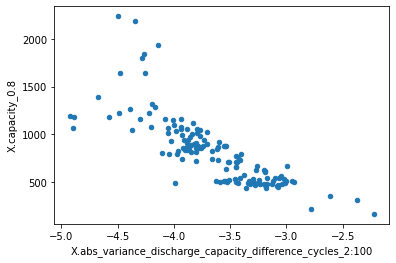

In [43]:
df_full.plot.scatter(x='X.abs_variance_discharge_capacity_difference_cycles_2:100', y = 'X.capacity_0.8')

In [45]:
train_ind = [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
        69, 71, 73, 75, 77, 79, 81]
test_ind = [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
        68, 70, 72, 74, 76, 78, 80, 82, 83]

In [99]:
# Variance model
X_train = df_full.iloc[train_ind][[variance_model_features]]
y_train = df_full.iloc[train_ind][[y]]

X_test = df_full.iloc[test_ind][[variance_model_features]]
y_test = df_full.iloc[test_ind][[y]]

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print("Training MSE: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("R2 :", r2_score(y_test, y_pred_test))

Training MSE:  18394.149669813367
Test MSE:  16353.756098141228
R2 : 0.7478599261521324


In [100]:
# discharge model
X_train = df_full.iloc[train_ind][discharge_model_features]
y_train = df_full.iloc[train_ind][[y]]

X_test = df_full.iloc[test_ind][discharge_model_features]
y_test = df_full.iloc[test_ind][[y]]

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print("Training MSE: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("R2 :", r2_score(y_test, y_pred_test))

Training MSE:  5649.498421264575
Test MSE:  7999.507098163562
R2 : 0.8766646452121936


In [101]:
# full model
X_train = df_full.iloc[train_ind][full_model_features]
y_train = df_full.iloc[train_ind][[y]]

X_test = df_full.iloc[test_ind][full_model_features]
y_test = df_full.iloc[test_ind][[y]]

reg = LinearRegression().fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

print("Training MSE: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE: ", mean_squared_error(y_test, y_pred_test))
print("R2 :", r2_score(y_test, y_pred_test))

Training MSE:  5124.602155256278
Test MSE:  12692.215880561847
R2 : 0.8043130746103226
